In [1]:
#로이터 뉴스 데이터 - 상위 1000개 단어
from keras.datasets import reuters
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [3]:
#가장 긴 길이를 기준으로 사이즈 통일(빈 부분: 0)
from tensorflow.keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train, maxlen=50)
X_test = sequence.pad_sequences(X_test, maxlen=50)

In [4]:
#원핫인코딩
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [5]:
#모델 생성
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
model = Sequential()
# 임베딩 레이어 - 1000개의 단어가 입력되어 100차원으로 출력
model.add(Embedding(1000,100))
model.add(LSTM(100))
# 46개의 뉴스 카테고리
model.add(Dense(46, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
#모델 학습
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=3)
hist = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_split=0.2, 
                 callbacks=[early_stopping])

Epoch 1/100
57/57 [==============================] - 4s 21ms/step - loss: 2.7322 - accuracy: 0.3371 - val_loss: 2.3985 - val_accuracy: 0.3450
Epoch 2/100
57/57 [==============================] - 1s 12ms/step - loss: 2.2370 - accuracy: 0.4185 - val_loss: 2.0317 - val_accuracy: 0.4869
Epoch 3/100
57/57 [==============================] - 1s 12ms/step - loss: 1.9512 - accuracy: 0.5066 - val_loss: 1.9942 - val_accuracy: 0.5092
Epoch 4/100
57/57 [==============================] - 1s 12ms/step - loss: 1.8058 - accuracy: 0.5333 - val_loss: 1.8239 - val_accuracy: 0.5331
Epoch 5/100
57/57 [==============================] - 1s 12ms/step - loss: 1.7118 - accuracy: 0.5562 - val_loss: 1.7233 - val_accuracy: 0.5504
Epoch 6/100
57/57 [==============================] - 1s 12ms/step - loss: 1.6592 - accuracy: 0.5694 - val_loss: 1.6835 - val_accuracy: 0.5582
Epoch 7/100
57/57 [==============================] - 1s 12ms/step - loss: 1.5917 - accuracy: 0.5882 - val_loss: 1.6234 - val_accuracy: 0.5776
Epoch 

In [7]:
#모델평가
scores = model.evaluate(X_train, y_train, verbose=1)
print("Train Accuracy: %.2f%%" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

281/281 [==============================] - 1s 4ms/step - loss: 0.9558 - accuracy: 0.7621
Train Accuracy: 76.21%
71/71 [==============================] - 0s 4ms/step - loss: 1.5284 - accuracy: 0.6460
Test Accuracy: 64.60%


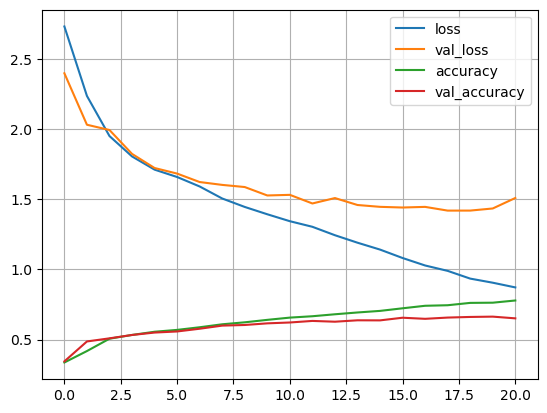

In [8]:
#모델 학습 과정 표시
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [10]:
import numpy as np
pred = model.predict(X_test)
print(pred[12])
print(np.argmax(pred[12]))

71/71 [==============================] - 0s 5ms/step
[5.60331275e-04 8.99350882e-01 4.20917105e-03 1.37089961e-03
 2.95483996e-03 6.98865764e-03 5.54155304e-05 2.95969730e-05
 1.11905087e-04 1.32618262e-03 4.07600142e-02 4.56343824e-03
 1.47816187e-04 8.91633239e-03 8.28284596e-04 3.29785072e-03
 5.37640299e-04 1.44881624e-05 7.05797765e-06 1.62861962e-03
 1.00208672e-04 1.35889757e-04 7.70221232e-04 6.71579794e-04
 6.72051637e-03 5.72854078e-05 4.61859076e-04 1.17694006e-04
 1.08204372e-02 2.31101494e-05 2.52520731e-05 8.25515017e-04
 1.93172193e-04 2.25136355e-05 3.83619372e-05 2.78045150e-06
 7.23857156e-05 1.45789832e-04 5.76386403e-04 4.76144851e-05
 2.16573564e-04 9.41685867e-05 1.01118167e-04 8.69237101e-06
 2.81013108e-05 6.34022726e-05]
1


In [11]:
print(y_test[12])
print(np.argmax(y_test[12]))

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1
